In [1]:
import pandas as pd
import numpy as np

In [7]:
import pymongo

DB_CONN_STRING = "mongodb://localhost:27017/"
DB_NAME = "poland-covid-vaccine-tweets"
COLLECTION_NAME = "tweets"

In [6]:
# import sys
# sys.path.append('/home/michal/dev/agh/eksploracja/project/poland-covid-vaccine/venv/lib/python3.8/site-packages')

In [8]:
mongo_client = pymongo.MongoClient(DB_CONN_STRING)
database_name = mongo_client[DB_NAME]
data_collection = database_name[COLLECTION_NAME]

In [9]:
tweets = [tweet for tweet in data_collection.find({})]

In [10]:
df = pd.DataFrame(tweets)
df

,_id,url,date,content,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceUrl,sourceLabel,retweetedTweet,quotedTweet,mentionedUsers,covid_topic,sentiment,was_quotedTweet
0,1366120906242818048,https://twitter.com/JirkaH5/status/13661209062...,2021-02-28T20:19:40+00:00,@AndrejBabis @AstraZeneca @MPKretschmer @Marku...,1019200557972639744,0,0,1,0,1366111535144325120,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[713035525, 62465691, 393264968, 793778228, 21...",True,0.0,NaN
1,1366091029452062726,https://twitter.com/GarciaRiesling/status/1366...,2021-02-28T18:20:56+00:00,BRD 🇩🇪🇩🇪 Corona - Witz \n\nPlan: zmniejszyć sc...,1299023069021908992,4,4,8,0,1366091029452062726,pl,http://twitter.com/#!/download/ipad,Twitter for iPad,None,NaN,"[3222588577, 8894972, 719190351974703104, 7898...",True,0.0,NaN
2,1366108573688856579,https://twitter.com/sta_____pawel/status/13661...,2021-02-28T19:30:39+00:00,@szejnfeld Dlaczego ta szczepionka wywołuje ta...,4107565035,0,0,1,0,1366046249653325824,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,[535452316],True,0.0,NaN
3,1366121799935746049,https://twitter.com/tomaszbryjow/status/136612...,2021-02-28T20:23:13+00:00,AstraZeneca dziesiątkuje prywatne przedszkola....,1257244746256441344,14,43,121,1,1366121799935746049,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,None,True,0.5,NaN
4,1366094731890069511,https://twitter.com/caspms/status/136609473189...,2021-02-28T18:35:39+00:00,Teściowa gorączkuje po szczepieniu Astrą Zenec...,1231031338699980800,5,1,51,1,1366094731890069511,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,None,True,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323531,1388168471230484483,https://twitter.com/Cassandra_Ilion/status/138...,2021-04-30T16:28:49+00:00,"Amerykański VAERS, w tym tyg. \npo Pfitzer zma...",844167800356782080,1,31,48,1,1388168471230484483,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,None,NaN,1.5,True
323532,1386955823700709378,https://twitter.com/olimpia_szuwar/status/1386...,2021-04-27T08:10:11+00:00,"Francuski ""wizjoner"" Jacques Attali w 2006 r.....",820209598250553344,10,97,178,14,1386955823700709378,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,None,NaN,0.0,True
323533,1386960213157236737,https://twitter.com/DrEricDing/status/13869602...,2021-04-27T08:27:37+00:00,AIR DISINFECTION: Schools without air purifyin...,18831926,68,1327,2239,153,1386960213157236737,en,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,NaN,2.0,True
323534,1351467891804299265,https://twitter.com/Tomasz25513555/status/1351...,2021-01-19T09:53:49+00:00,Kiedy niepełnosprawni się zaszczepią? W Narodo...,1241681600632573953,0,0,1,1,1351467891804299265,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[1272453020513689600, 1462263984, 2776583390, ...",NaN,-3.0,True


In [11]:
df.date = pd.to_datetime(df.date)

In [14]:
minimal = df.loc[df.groupby('conversationId')['date'].idxmin()]
minimal = minimal.loc[minimal['_id'] == minimal['conversationId']][['_id', 'conversationId', 'sentiment', 'date']]
minimal = minimal.rename(columns={'date': 'minimalDate', '_id': 'minimalId'})

In [15]:
minimal

,minimalId,conversationId,sentiment,minimalDate
320836,382608319577587712,382608319577587712,-1.0,2013-09-24 20:51:46+00:00
320383,459013710284353536,459013710284353536,0.0,2014-04-23 16:59:31+00:00
321882,552799382094241792,552799382094241792,0.0,2015-01-07 12:10:17+00:00
321237,716240087399403520,716240087399403520,0.5,2016-04-02 12:25:18+00:00
315811,905049080002424833,905049080002424833,-0.5,2017-09-05 12:44:50+00:00
...,...,...,...,...
203988,1388272691564716032,1388272691564716032,0.5,2021-04-30 23:22:57+00:00
138455,1388275896210149383,1388275896210149383,2.0,2021-04-30 23:35:41+00:00
138454,1388277674464976897,1388277674464976897,1.0,2021-04-30 23:42:45+00:00
244562,1388278250078617611,1388278250078617611,0.0,2021-04-30 23:45:02+00:00


In [16]:
maximal = df.loc[df.groupby('conversationId')['date'].idxmax()]
maximal = maximal[['conversationId', 'date']].rename(columns={'date': 'maximalDate'})

In [17]:
maximal

,conversationId,maximalDate
163448,11788902058,2021-04-05 06:30:34+00:00
320836,382608319577587712,2013-09-24 20:51:46+00:00
320383,459013710284353536,2014-04-23 16:59:31+00:00
321882,552799382094241792,2015-01-07 12:10:17+00:00
321237,716240087399403520,2016-04-02 12:25:18+00:00
...,...,...
128771,1388273467997499394,2021-04-30 23:36:56+00:00
138455,1388275896210149383,2021-04-30 23:35:41+00:00
138454,1388277674464976897,2021-04-30 23:42:45+00:00
244562,1388278250078617611,2021-04-30 23:45:02+00:00


In [18]:
merged = pd.merge(minimal, maximal, on='conversationId')

In [19]:
merged['dateDiff'] = merged['maximalDate'] - merged['minimalDate']

In [20]:
merged.sort_values(by=['dateDiff'], ascending=False)

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff
5,989841396633829376,989841396633829376,-2.0,2018-04-27 12:19:13+00:00,2021-03-21 14:44:01+00:00,1059 days 02:24:48
12,1238508622591725568,1238508622591725568,1.5,2020-03-13 16:54:00+00:00,2021-04-28 21:25:49+00:00,411 days 04:31:49
52,1329523471530008610,1329523471530008610,0.0,2020-11-19 20:34:31+00:00,2021-04-28 20:38:59+00:00,160 days 00:04:28
689,1356252057766940672,1356252057766940672,2.0,2021-02-01 14:44:23+00:00,2021-05-09 16:39:18+00:00,97 days 01:54:55
86,1346166730150846464,1346166730150846464,1.0,2021-01-04 18:48:53+00:00,2021-03-30 18:38:57+00:00,84 days 23:50:04
...,...,...,...,...,...,...
32894,1372445180461260802,1372445180461260802,1.5,2021-03-18 07:10:04+00:00,2021-03-18 07:10:04+00:00,0 days 00:00:00
32893,1372444996855549953,1372444996855549953,0.5,2021-03-18 07:09:20+00:00,2021-03-18 07:09:20+00:00,0 days 00:00:00
32892,1372444933655818240,1372444933655818240,0.0,2021-03-18 07:09:05+00:00,2021-03-18 07:09:05+00:00,0 days 00:00:00
32890,1372444807461765122,1372444807461765122,0.5,2021-03-18 07:08:35+00:00,2021-03-18 07:08:35+00:00,0 days 00:00:00


In [31]:
merged['dateDiff']

0       0 days 00:00:00
1       0 days 00:00:00
2       0 days 00:00:00
3       0 days 00:00:00
4       0 days 00:00:00
              ...      
89855   0 days 00:35:58
89856   0 days 00:00:00
89857   0 days 00:00:00
89858   0 days 00:00:00
89859   0 days 00:00:00
Name: dateDiff, Length: 89860, dtype: timedelta64[ns]

In [30]:
pd.qcut(merged["dateDiff"],4, duplicates = "drop").value_counts()

(-1 days +23:59:59.999999999, 1059 days 02:24:48]    89860
Name: dateDiff, dtype: int64

In [57]:
bins = [
    pd.Timedelta("nan"),
    pd.Timedelta(minutes = 30),
    pd.Timedelta(minutes = 60),
    pd.Timedelta(days = 1),
    pd.Timedelta(days = 2),
    pd.Timedelta(days = 3),
    pd.Timedelta(days = 7),
    pd.Timedelta(days = 14),
    pd.Timedelta(days = 30),
    pd.Timedelta(weeks = 2000)
]
labels = ['0-30 min', '30-60 min', '60 min-1 day', '1-2 days', '2-3 days', '3-7 days', '7-14 days', 
          '14-30 days', '30+ days']

In [58]:
merged['bins'] = pd.cut(merged['dateDiff'], bins, labels = labels)

In [73]:
merged

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff,bins
0,382608319577587712,382608319577587712,-1.0,2013-09-24 20:51:46+00:00,2013-09-24 20:51:46+00:00,0 days 00:00:00,0-30 min
1,459013710284353536,459013710284353536,0.0,2014-04-23 16:59:31+00:00,2014-04-23 16:59:31+00:00,0 days 00:00:00,0-30 min
2,552799382094241792,552799382094241792,0.0,2015-01-07 12:10:17+00:00,2015-01-07 12:10:17+00:00,0 days 00:00:00,0-30 min
3,716240087399403520,716240087399403520,0.5,2016-04-02 12:25:18+00:00,2016-04-02 12:25:18+00:00,0 days 00:00:00,0-30 min
4,905049080002424833,905049080002424833,-0.5,2017-09-05 12:44:50+00:00,2017-09-05 12:44:50+00:00,0 days 00:00:00,0-30 min
...,...,...,...,...,...,...,...
89855,1388272691564716032,1388272691564716032,0.5,2021-04-30 23:22:57+00:00,2021-04-30 23:58:55+00:00,0 days 00:35:58,30-60 min
89856,1388275896210149383,1388275896210149383,2.0,2021-04-30 23:35:41+00:00,2021-04-30 23:35:41+00:00,0 days 00:00:00,0-30 min
89857,1388277674464976897,1388277674464976897,1.0,2021-04-30 23:42:45+00:00,2021-04-30 23:42:45+00:00,0 days 00:00:00,0-30 min
89858,1388278250078617611,1388278250078617611,0.0,2021-04-30 23:45:02+00:00,2021-04-30 23:45:02+00:00,0 days 00:00:00,0-30 min


In [88]:
grouped = merged.groupby('bins').count()
grouped

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff
bins,,,,,,
0-30 min,76587,76587,76587,76587,76587,76587
30-60 min,1634,1634,1634,1634,1634,1634
60 min-1 day,9117,9117,9117,9117,9117,9117
1-2 days,1292,1292,1292,1292,1292,1292
2-3 days,400,400,400,400,400,400
3-7 days,554,554,554,554,554,554
7-14 days,168,168,168,168,168,168
14-30 days,61,61,61,61,61,61
30+ days,47,47,47,47,47,47


<AxesSubplot:xlabel='bins'>

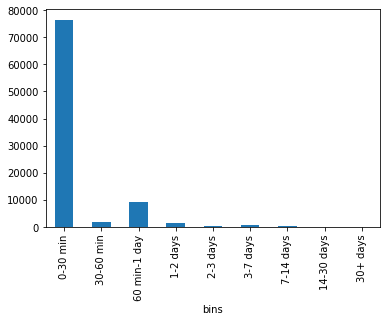

In [171]:
grouped.reset_index().plot.bar(x='bins', y='minimalId', legend = False)

In [97]:
merged["sentiment"] = pd.to_numeric(merged["sentiment"])

In [101]:
grouped_xd = merged.groupby('dateDiff').agg( {'sentiment':['mean','std']}).reset_index()
grouped_xd.filter()

<AxesSubplot:>

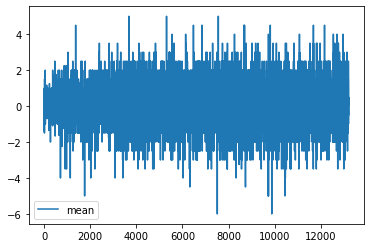

In [177]:
grouped_xd.loc[grouped_xd['dateDiff'] < pd.Timedelta(weeks = 1)]['sentiment'].plot(y='mean')

In [110]:
merged['sentimentHigh'] = merged['sentiment'] < 0

<AxesSubplot:xlabel='sentiment is high', ylabel='count'>

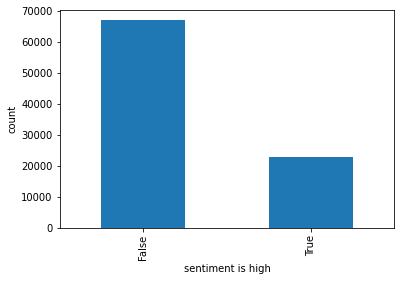

In [124]:
merged.groupby('sentimentHigh').count().reset_index().plot.bar(x='sentimentHigh', y='minimalId', xlabel='sentiment is high', ylabel = 'count', legend = False)

In [128]:
merged['secondsOfLife'] = merged['dateDiff'].dt.total_seconds()

In [163]:
grouped_by_sentiment = merged.groupby('sentiment').agg( {'secondsOfLife':['mean','std']})

<AxesSubplot:title={'center':'Average times'}, xlabel='sentiment'>

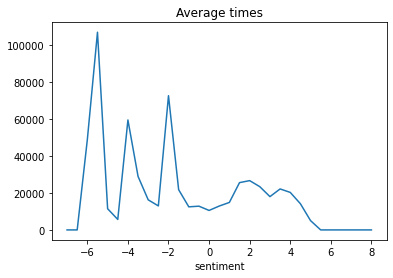

In [178]:
grouped_by_sentiment.secondsOfLife.plot(y = "mean", legend = False,title = "Average times")